# **Simple RL Simulation in Python**

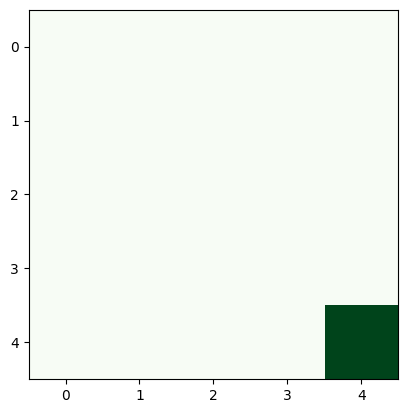

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment (5x5 Grid)
grid_size = 5
grid = np.zeros((grid_size, grid_size))
start_pos = (0, 0)  # Start at top-left
goal_pos = (4, 4)   # Goal at bottom-right
grid[goal_pos] = 10  # +10 reward for reaching the goal

def display_grid(grid):
    plt.imshow(grid, cmap="Greens", interpolation="nearest")
    plt.show()

display_grid(grid)


In [ ]:
# Define possible actions
actions = ["Up", "Down", "Left", "Right"]

# Function to take an action
def take_action(state, action):
    x, y = state
    if action == 0 and x > 0:        # Move Up
        x -= 1
    elif action == 1 and x < grid_size - 1:  # Move Down
        x += 1
    elif action == 2 and y > 0:      # Move Left
        y -= 1
    elif action == 3 and y < grid_size - 1:  # Move Right
        y += 1
    return (x, y)


In [ ]:
import random

def simulate_agent():
    state = start_pos
    steps = 1000
    print("Initial State:", state)

    for step in range(steps):
        action = random.choice(range(4))  # Randomly choose an action
        next_state = take_action(state, action)
        print(f"Step {step + 1}: Action = {actions[action]}, New State = {next_state}")
        state = next_state
        if state == goal_pos:
            print("🎉 Goal Reached!")
            break

simulate_agent()


Initial State: (0, 0)
Step 1: Action = Down, New State = (1, 0)
Step 2: Action = Down, New State = (2, 0)
Step 3: Action = Right, New State = (2, 1)
Step 4: Action = Up, New State = (1, 1)
Step 5: Action = Up, New State = (0, 1)
Step 6: Action = Down, New State = (1, 1)
Step 7: Action = Up, New State = (0, 1)
Step 8: Action = Left, New State = (0, 0)
Step 9: Action = Right, New State = (0, 1)
Step 10: Action = Down, New State = (1, 1)
Step 11: Action = Left, New State = (1, 0)
Step 12: Action = Down, New State = (2, 0)
Step 13: Action = Right, New State = (2, 1)
Step 14: Action = Right, New State = (2, 2)
Step 15: Action = Right, New State = (2, 3)
Step 16: Action = Up, New State = (1, 3)
Step 17: Action = Left, New State = (1, 2)
Step 18: Action = Up, New State = (0, 2)
Step 19: Action = Up, New State = (0, 2)
Step 20: Action = Up, New State = (0, 2)
Step 21: Action = Down, New State = (1, 2)
Step 22: Action = Down, New State = (2, 2)
Step 23: Action = Left, New State = (2, 1)
Step 24

# **Epsilon-Greedy Bandit**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms (slot machines)
num_arms = 3
# True probabilities of winning for each arm (unknown to the agent)
true_probabilities = [0.3, 0.5, 0.8]  # Arm 0 has 30%, Arm 1 has 50%, Arm 2 has 80%

def pull_arm(arm):
    """Simulate pulling the selected arm, return reward (1) or no reward (0)."""
    return 1 if np.random.rand() < true_probabilities[arm] else 0

print("True Probabilities of Arms:", true_probabilities)


True Probabilities of Arms: [0.3, 0.5, 0.8]


In [ ]:
# Epsilon value (probability of exploration)
epsilon = 0.1
# Number of trials (pulling arms)
num_trials = 10000

# Initialize values
estimated_values = np.zeros(num_arms)  # Estimated value for each arm
counts = np.zeros(num_arms)            # Count of times each arm was pulled
rewards = []                           # Track all rewards for plotting

for trial in range(num_trials):
    # Choose action (explore or exploit)
    if np.random.rand() < epsilon:
        action = np.random.choice(num_arms)  # Explore (random action)
    else:
        action = np.argmax(estimated_values)  # Exploit (best known action)

    # Pull the selected arm
    reward = pull_arm(action)
    rewards.append(reward)

    # Update values
    counts[action] += 1
    estimated_values[action] += (reward - estimated_values[action]) / counts[action]

print("Estimated Values of Arms:", estimated_values)
print("Counts of Each Arm Pulled:", counts)
print("Total Rewards:", sum(rewards))
print(rewards)

Estimated Values of Arms: [0.29444444 0.49275362 0.80710059]
Counts of Each Arm Pulled: [ 360.  345. 9295.]
Total Rewards: 7778
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1

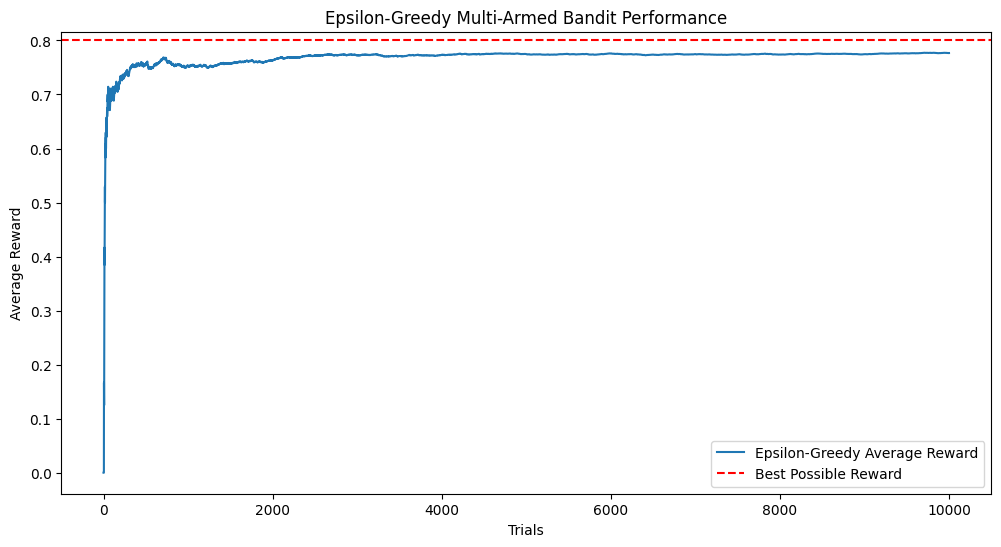

In [ ]:
# Calculate cumulative rewards
cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / (np.arange(num_trials) + 1)

# Plotting the learning progress
plt.figure(figsize=(12, 6))
plt.plot(average_rewards, label="Epsilon-Greedy Average Reward")
plt.axhline(max(true_probabilities), color='r', linestyle='--', label="Best Possible Reward")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy Multi-Armed Bandit Performance")
plt.legend()
plt.show()


# **UCB Multi-Armed Bandit**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms (slot machines)
num_arms = 3
# True probabilities of winning for each arm (unknown to the agent)
true_probabilities = [0.3, 0.5, 0.8]  # Arm 0 has 30%, Arm 1 has 50%, Arm 2 has 80%

def pull_arm(arm):
    """Simulate pulling the selected arm, return reward (1) or no reward (0)."""
    return 1 if np.random.rand() < true_probabilities[arm] else 0

print("True Probabilities of Arms:", true_probabilities)


True Probabilities of Arms: [0.3, 0.5, 0.8]


In [ ]:
# Number of trials
num_trials = 10000
# Exploration parameter (higher means more exploration)
c = 1

# Initialize values
estimated_values = np.zeros(num_arms)  # Estimated value for each arm
counts = np.zeros(num_arms)            # Count of times each arm was pulled
rewards = []                           # Track all rewards for plotting

for trial in range(num_trials):
    # Choose action using UCB
    if trial < num_arms:
        # Initially, try each arm at least once
        action = trial
    else:
        # Calculate UCB values for each arm
        ucb_values = estimated_values + c * np.sqrt(np.log(trial + 1) / (counts + 1e-5))
        action = np.argmax(ucb_values)  # Choose the arm with the highest UCB value

    # Pull the selected arm
    reward = pull_arm(action)
    rewards.append(reward)

    # Update values
    counts[action] += 1
    estimated_values[action] += (reward - estimated_values[action]) / counts[action]

print("Estimated Values of Arms:", estimated_values)
print("Counts of Each Arm Pulled:", counts)




Estimated Values of Arms: [0.37777778 0.46376812 0.80184099]
Counts of Each Arm Pulled: [  45.   69. 9886.]


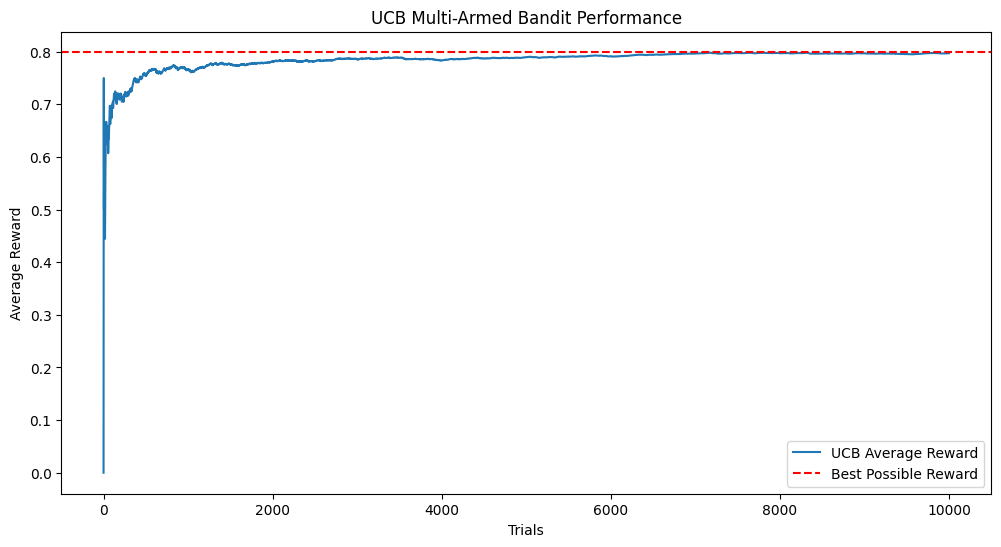

In [ ]:
# Calculate cumulative rewards
cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / (np.arange(num_trials) + 1)

# Plotting the learning progress
plt.figure(figsize=(12, 6))
plt.plot(average_rewards, label="UCB Average Reward")
plt.axhline(max(true_probabilities), color='r', linestyle='--', label="Best Possible Reward")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("UCB Multi-Armed Bandit Performance")
plt.legend()
plt.show()


# **Thompson Sampling**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Number of arms (slot machines)
num_arms = 3
# True probabilities of winning for each arm (unknown to the agent)
true_probabilities = [0.3, 0.5, 0.8]  # Arm 0 has 30%, Arm 1 has 50%, Arm 2 has 80%

def pull_arm(arm):
    """Simulate pulling the selected arm, return reward (1) or no reward (0)."""
    return 1 if np.random.rand() < true_probabilities[arm] else 0

print("True Probabilities of Arms:", true_probabilities)


True Probabilities of Arms: [0.3, 0.5, 0.8]


In [ ]:
# Number of trials
num_trials = 1000

# Initialize alpha and beta for each arm (prior beliefs)
alphas = np.ones(num_arms)  # Initially 1 for each arm
betas = np.ones(num_arms)   # Initially 1 for each arm
rewards = []                # Track all rewards for plotting

for trial in range(num_trials):
    # Sample a value from the Beta distribution for each arm
    sampled_values = [np.random.beta(alphas[i], betas[i]) for i in range(num_arms)]

    # Choose the arm with the highest sampled value
    action = np.argmax(sampled_values)

    # Pull the selected arm
    reward = pull_arm(action)
    rewards.append(reward)

    # Update the Beta distribution for the chosen arm
    if reward == 1:
        alphas[action] += 1  # Increase alpha (wins)
    else:
        betas[action] += 1   # Increase beta (losses)

print("Final Alpha Values (Successes):", alphas)
print("Final Beta Values (Failures):", betas)


Final Alpha Values (Successes): [  2.  13. 760.]
Final Beta Values (Failures): [  5.  13. 213.]


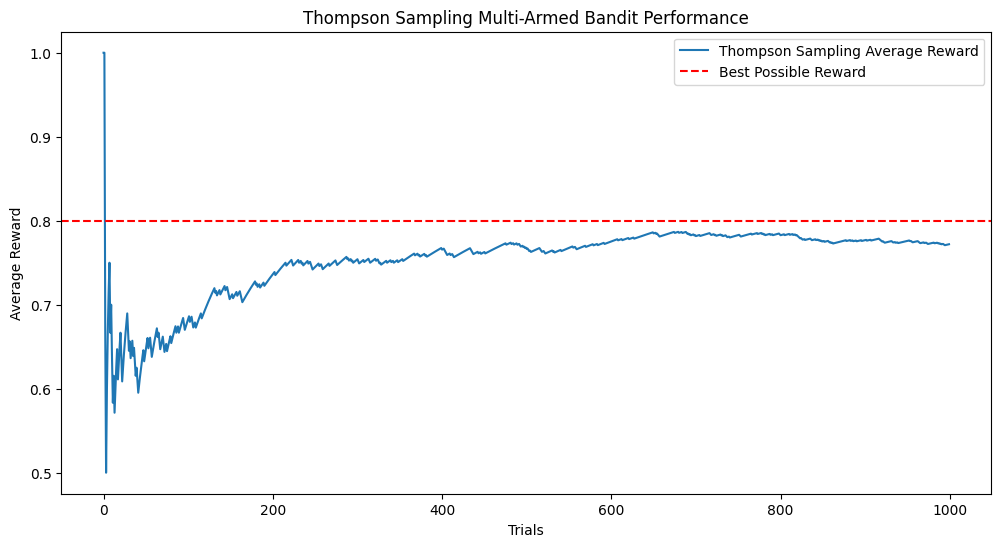

In [ ]:
# Calculate cumulative rewards
cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / (np.arange(num_trials) + 1)

# Plotting the learning progress
plt.figure(figsize=(12, 6))
plt.plot(average_rewards, label="Thompson Sampling Average Reward")
plt.axhline(max(true_probabilities), color='r', linestyle='--', label="Best Possible Reward")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Thompson Sampling Multi-Armed Bandit Performance")
plt.legend()
plt.show()


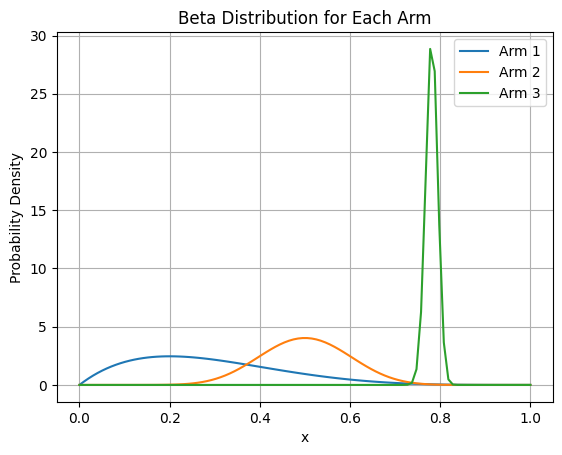

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the beta distribution
a = alphas  # Alpha parameter
b = betas  # Beta parameter

# Generate x values
x = np.linspace(0, 1, 100)

# Calculate and plot the PDF for each arm separately
for i in range(len(a)):
    y = beta.pdf(x, a[i], b[i])  # PDF for the i-th arm
    plt.plot(x, y, label=f"Arm {i+1}")

plt.title("Beta Distribution for Each Arm")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()